# TP 1 S 4

## SI Model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [31]:
#function definition of cumulative growth curve as a function of time
def infected(a,b,x):
    y = (a*np.exp(b*x))/(1-a+a*np.exp(b*x))
    return y

def simulate_SI(N, init_infected, beta):
    t = np.arange(0,101,1)
    S0 = (N - init_infected)/N
    x0 = init_infected / N
    #computed the number of infected and susceptible as a function of time
    It=[]
    St=[]
    printed = False
    for i in t:
        I=infected(x0,beta,i)
        It.append(I)
        St.append(S0-I)
        if I >= 0.5 and printed == False:
            print(i)
            printed = True
    return It, St




### Q 1 - 2

In [32]:
It, St = simulate_SI(N = 1000000, init_infected = 2, beta = 0.2)

66



Half of the population become infected between steps 65 and 66.

In [38]:

def plot_SI(file_name):
    #plot the results
    plt.plot(t,It, c='red',label="Infected",lw=2)
    plt.plot(t,St,c='blue',label="Susceptible",lw=2)
    plt.xlim(0,100)
    plt.xticks(np.arange(0,110,10))
    plt.ylim(-0.1,1.1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(loc='center right',frameon=False)
    plt.xlabel("Time")
    plt.ylabel("Susceptible, Infected")
    plt.title("SI model, $\\beta$ = %s, N = %s, S0 = %s and x$_0$ = %s"%(beta,N,S0,x0))
    #plt.show()
    plt.savefig(file_name)
    
def show_SI(It, St):
        #plot the results
    plt.plot(t,It, c='red',label="Infected",lw=2)
    plt.plot(t,St,c='blue',label="Susceptible",lw=2)
    plt.xlim(0,100)
    plt.xticks(np.arange(0,110,10))
    plt.ylim(-0.1,1.1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(loc='center right',frameon=False)
    plt.xlabel("Time")
    plt.ylabel("Susceptible, Infected")
    plt.title("SI model, $\\beta$ = %s, N = %s, S0 = %s and x$_0$ = %s"%(beta,N,S0,x0))
    plt.show()


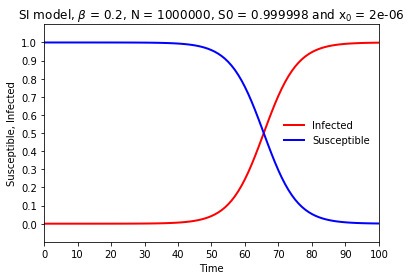

In [19]:
plot_SI("SI-01.pdf")

### Q3


22


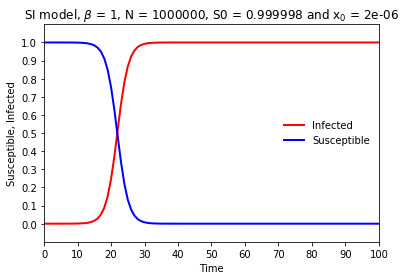

In [33]:
It, St = simulate_SI(1000000, 2, 0.6)
plot_SI("SI-02.pdf")

12


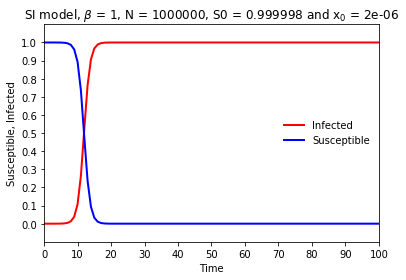

In [34]:
It, St = simulate_SI(1000000, 2, 1.1)
plot_SI("SI-03.pdf")

### Q4
 We play with the parameters

In [39]:
def sim_show_Si(N,ii,beta):
    It, St = simulate_SI(N, ii, beta)
    show_SI(It, St)

43


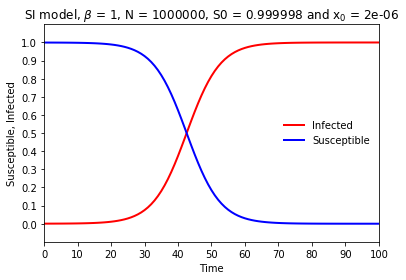

In [43]:
sim_show_Si(100000, 20, 0.2)

32


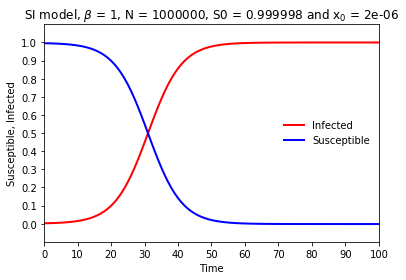

In [44]:
sim_show_Si(100000, 200, 0.2)

78


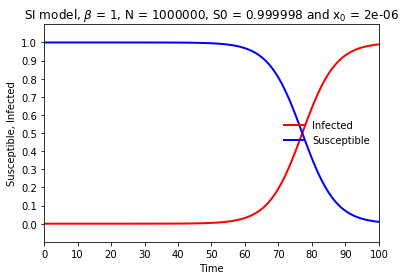

In [46]:
sim_show_Si(10000000, 2, 0.2)

20


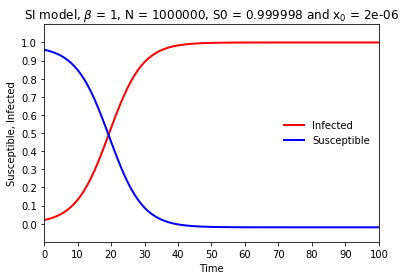

In [47]:
sim_show_Si(100, 2, 0.2)

## SIR Model

In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [63]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
def sim_SIR(pop, init_infected, init_recovered, trans_rate, recovery_rate, max_t=100, out_file=''):
    # Total population, N.
    N = pop
    # Initial number of infected and recovered individuals, I0 and R0.
    I0 = init_infected
    R0 = init_recovered
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # transmission rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta =  trans_rate
    gamma = recovery_rate
    # A grid of time points (in days)
    t = np.linspace(0, max_t, max_t)
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    plt.xlabel('Time /days')
    plt.ylabel('Susceptible, Infected, Recovered')
    plt.ylim(-0.1,1.2)
    plt.xlim(min(t),max(t))
    plt.xticks(np.arange(min(t),max(t)+10,20))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(loc="upper right", frameon=False)
    plt.title("SIR model, N = %s, S0 = %s, x0 = %s, $\\beta$ = %s, $\\gamma$ = %s"%(N,S0,I0,beta,gamma))
    if out_file == '':
        plt.show()
    else:
        plt.savefig(out_file)
    

### Q5

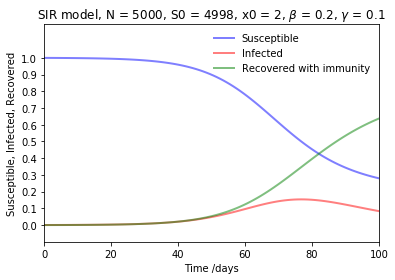

In [66]:
sim_SIR(pop=5000,init_infected=2,init_recovered=0,trans_rate=0.2,recovery_rate=0.1,max_t=100, out_file= 'SIR-01.pdf')

### Q7 : We play with the parameters

#### Changment du taux d'infection

En augmentant le taux d'infection, on remarque que le processus semble accélérer, avec un pic des infectés plus prononcé. Les courbes semblent se "compresser".

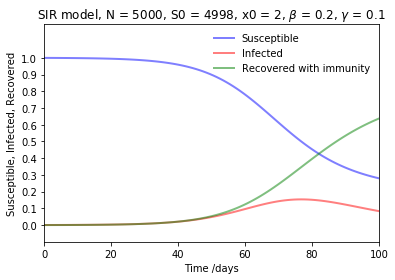

In [95]:
sim_SIR(pop=5000,init_infected=2,init_recovered=0,trans_rate=0.2,recovery_rate=0.1,max_t=100, out_file= 'SIR_q7_1.pdf')

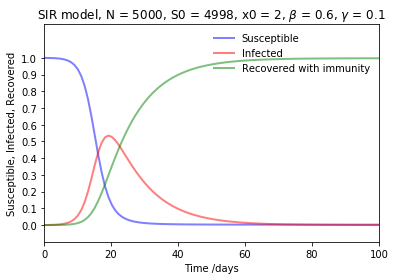

In [69]:
sim_SIR(pop=5000,init_infected=2,init_recovered=0,trans_rate=0.6,recovery_rate=0.1,max_t=100, out_file= 'SIR_q7_2.pdf')

#### Changement de la population initiale N

En augmentant le nombre d’individus N dans la population, nous réduisons mécaniquement la porportion initiale d'infectés. Les courbes obtenues ressemblents aux courbes obtenues précédemment avec 2 infectés et semblent "décalées" vers la droite.

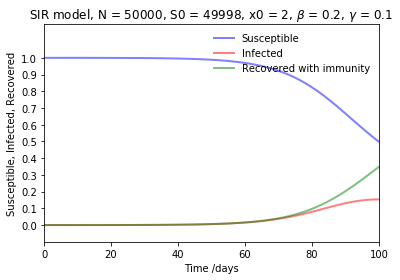

In [85]:
sim_SIR(pop=50000,init_infected=2,init_recovered=0,trans_rate=0.2,recovery_rate=0.1,max_t=100, out_file= 'SIR_q7_5.pdf')

#### Changement de gamma (recovery rate)

La division du facteur gamma par un facteur 10 a une influence sur la vitesse d’accroissement du nombre de patients guéris (pente de la courbe verte) : avec un gamma plus petit, cette vitesse est plus petite. Le facteur gamma a également une incidence sur le nombre de patients infectés : en abaissant le recovery rate, le nombre de patients infectés croit rapidement et de manière importante et cela à un t plus petit. 

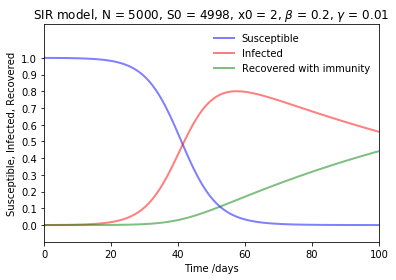

In [70]:
sim_SIR(pop=5000,init_infected=2,init_recovered=0,trans_rate=0.2,recovery_rate=0.01,max_t=100, out_file= 'SIR_q7_3.pdf')

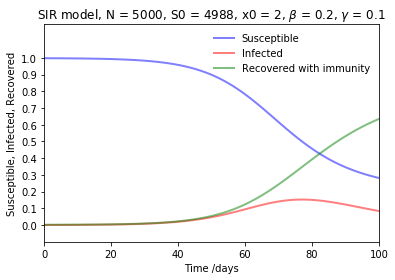

In [71]:
sim_SIR(pop=5000,init_infected=2,init_recovered=10,trans_rate=0.2,recovery_rate=0.1,max_t=100, out_file= 'SIR_q7_4.pdf')

### Q8

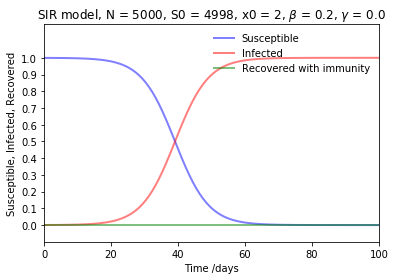

In [72]:
sim_SIR(pop=5000,init_infected=2,init_recovered=0,trans_rate=0.2,recovery_rate=0.0,max_t=100, out_file='from-sir-to-si.pdf')

We set gamma the recovery rate to 0 in order to obtain a SI model fro ma SIR model.

### Q9

We simulate a SIR model in which the infection would not be able to start. We take S0 < to gamma / beta.

With gamma = 0.1, beta = 0.2 and S0 < 0.2 => Arbitralrily, S0 = 2000

To do this, we will define R0 = 2998 and I0 = 2.

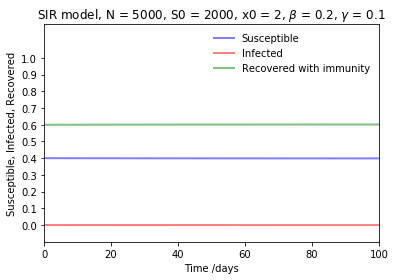

In [74]:
sim_SIR(pop=5000,init_infected=2,init_recovered=2998,trans_rate=0.2,recovery_rate=0.1,max_t=100, out_file= 'spreading.pdf')

## SIS model

In [77]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [78]:
def C(b,g,x):
    return (b*x)/(b-g-b*x)

def Infec(b,g,t,c):
    return (1-(g/b))*((c*np.exp((b-g)*t))/(1+c*np.exp((b-g)*t)))

def sim_sis(pop = 1000000, init_infected = 1, trans_rate = 0.8, recov_rate = 0.2, outfile = ''):
    N =  pop #pop tot
    S0 = (N - init_infected)/N #initial susceptible prop
    x0 = init_infected/N #intial infected prop
    beta = trans_rate #transmission rate
    gamma = recov_rate #recovery rate
    t=np.arange(0,101,1) #time range
    const=C(beta,gamma,x0)
    It=[]
    St=[]
    for i in t:
        I=Infec(beta,gamma,i,const) 
        It.append(I)
        St.append(S0-I)
    #plot the results
    plt.plot(t,It, c='red',label="Infected",lw=2)
    plt.plot(t,St,c='blue',label="Susceptible",lw=2)
    plt.xlim(0,100)
    plt.xticks(np.arange(0,110,10))
    plt.ylim(-0.1,1.1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend(loc='center right',frameon=False)
    plt.xlabel("Time")
    plt.ylabel("Susceptible, Infected")
    plt.title("SI model, $\\beta$ = %s, $\\gamma$ = %s, N = %s, S0= %s and x$_0$ = %s"%(beta,gamma,N,S0,x0))
    if outfile == '':
        plt.show()
    else:
        plt.savefig(outfile)

### Q10

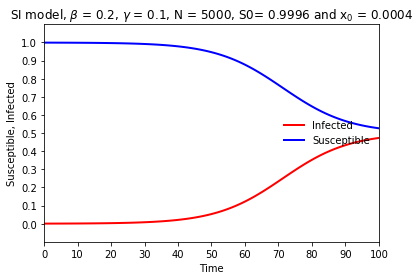

In [79]:
sim_sis(pop = 5000, init_infected=2, trans_rate=0.2, recov_rate=0.1, outfile='SIS-01.pdf')

### Q11

En accroissant le nombre de patients initialement infectés, les courbes des patients infectés et des patients susceptibles d’être infectées convergent plus rapidement l’un vers l’autre, ce qui indique que l’ensemble de la population est infectée.

On remarque aussi que pour un recovery rate supérieur au taux de transmission, les deux courbes ne semblent pas se croiser. L’infection ne se propage pas.

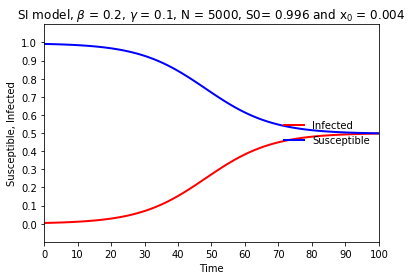

In [86]:
sim_sis(pop = 5000, init_infected=20, trans_rate=0.2, recov_rate=0.1, outfile='SIS-q11-01.pdf')

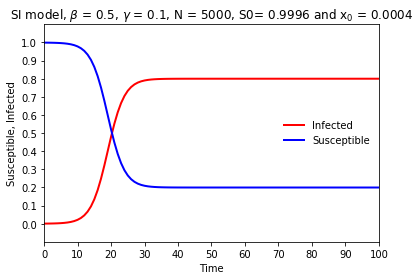

In [87]:
sim_sis(pop = 5000, init_infected=2, trans_rate=0.5, recov_rate=0.1, outfile='SIS-q11-02.pdf')

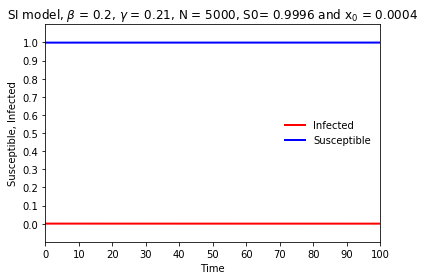

In [93]:
sim_sis(pop = 5000, init_infected=2, trans_rate=0.2, recov_rate=0.21, outfile='SIS-q11-03.pdf')

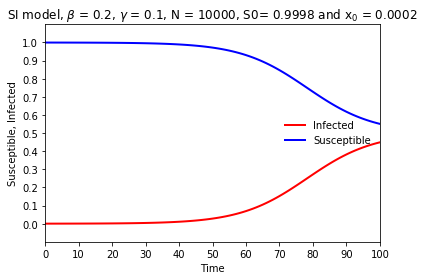

In [94]:
sim_sis(pop = 10000, init_infected=2, trans_rate=0.2, recov_rate=0.1, outfile='SIS-q11-04.pdf')